# Data augmentation 적용하여 Detector 성능 개선시키기

## 1. Bus-Truck 데이터셋 살펴보기

In [3]:
import os
import pandas as pd
from utils import CLASS_NAME_TO_ID, visualize

In [4]:
data_dir = "../DATASET/Detection/"
data_df = pd.read_csv(os.path.join(data_dir, 'df.csv'))

In [5]:
data_df

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
0,0000599864fd15b3,xclick,Bus,1,0.343750,0.908750,0.156162,0.650047,1,0,...,0,0,0.421875,0.343750,0.795000,0.908750,0.156162,0.512700,0.650047,0.457197
1,00006bdb1eb5cd74,xclick,Truck,1,0.276667,0.697500,0.141604,0.437343,1,0,...,0,0,0.299167,0.276667,0.697500,0.659167,0.141604,0.241855,0.352130,0.437343
2,00006bdb1eb5cd74,xclick,Truck,1,0.702500,0.999167,0.204261,0.409774,1,1,...,0,0,0.849167,0.702500,0.906667,0.999167,0.204261,0.398496,0.409774,0.295739
3,00010bf498b64bab,xclick,Bus,1,0.156250,0.371250,0.269188,0.705228,0,0,...,0,0,0.274375,0.371250,0.311875,0.156250,0.269188,0.493882,0.705228,0.521691
4,00013f14dd4e168f,xclick,Bus,1,0.287500,0.999375,0.194184,0.999062,0,1,...,0,0,0.920000,0.999375,0.648750,0.287500,0.194184,0.303940,0.999062,0.523452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24057,fff2b15ad6007d0e,activemil,Truck,1,0.277344,0.622656,0.226389,0.859722,0,0,...,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
24058,fff376d20410e4c9,xclick,Bus,1,0.295625,0.558750,0.306667,0.397500,1,0,...,1,0,0.424375,0.316250,0.295625,0.558750,0.306667,0.397500,0.382500,0.335833
24059,fff376d20410e4c9,xclick,Bus,1,0.348125,0.701250,0.423333,0.744167,0,0,...,1,0,0.478750,0.493125,0.348125,0.701250,0.423333,0.744167,0.537500,0.523333
24060,fffde5953a818927,xclick,Bus,1,0.277500,0.605625,0.565000,0.795833,0,0,...,0,0,0.488125,0.277500,0.517500,0.605625,0.565000,0.670000,0.795833,0.704167


In [6]:
index = 0
image_files = [fn for fn in os.listdir("../DATASET/Detection/images/") if fn.endswith("jpg")]
image_file = image_files[index]
image_path = os.path.join("../DATASET/Detection/images/", image_file)

In [7]:
import cv2
import matplotlib.pyplot as plt

In [8]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

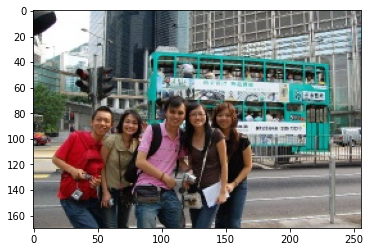

In [9]:
plt.imshow(image)

In [10]:
image_id = image_file.split('.')[0]
meta_data = data_df[data_df['ImageID'] == image_id]
cate_names = meta_data["LabelName"].values
bboxes = meta_data[["XMin", "XMax", "YMin", "YMax"]].values

In [11]:
cate_names

array(['Bus'], dtype=object)

In [12]:
bboxes

array([[0.34375 , 0.90875 , 0.156162, 0.650047]])

In [13]:
img_H, img_W, _ = image.shape

class_ids = [CLASS_NAME_TO_ID[cate_name] for cate_name in cate_names]
unnorm_bboxes = bboxes.copy()
unnorm_bboxes[:, [1,2]] = unnorm_bboxes[:, [2,1]]
unnorm_bboxes[:, 2:4] -= unnorm_bboxes[:, 0:2]
unnorm_bboxes[:, 0:2] += (unnorm_bboxes[:, 2:4] / 2)
unnorm_bboxes[:, [0,2]] *= img_W
unnorm_bboxes[:, [1,3]] *= img_H

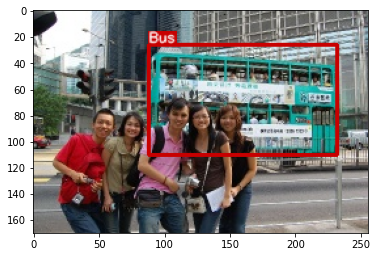

In [14]:
canvas = visualize(image, unnorm_bboxes, class_ids)
plt.figure(figsize=(6,6))
plt.imshow(canvas)
plt.show()

In [15]:
from ipywidgets import interact

In [16]:
@interact(index=(0, len(image_files)-1))
def show_sample(index=0):
    image_file = image_files[index]
    image_path = os.path.join("../DATASET/Detection/images/", image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    image_id = image_file.split('.')[0]
    meta_data = data_df[data_df['ImageID'] == image_id]
    cate_names = meta_data["LabelName"].values
    bboxes = meta_data[["XMin", "XMax", "YMin", "YMax"]].values
    
    img_H, img_W, _ = image.shape

    class_ids = [CLASS_NAME_TO_ID[cate_name] for cate_name in cate_names]
    unnorm_bboxes = bboxes.copy()
    unnorm_bboxes[:, [1,2]] = unnorm_bboxes[:, [2,1]]
    unnorm_bboxes[:, 2:4] -= unnorm_bboxes[:, 0:2]
    unnorm_bboxes[:, 0:2] += (unnorm_bboxes[:, 2:4] / 2)
    unnorm_bboxes[:, [0,2]] *= img_W
    unnorm_bboxes[:, [1,3]] *= img_H
    canvas = visualize(image, unnorm_bboxes, class_ids)
    
    plt.figure(figsize=(6,6))
    plt.imshow(canvas)
    plt.axis('off')
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=15224), Output()), _dom_classes=('widget-int…

## 2. Object detection 데이터셋 구축과 Data augmentation 기법 적용해보기

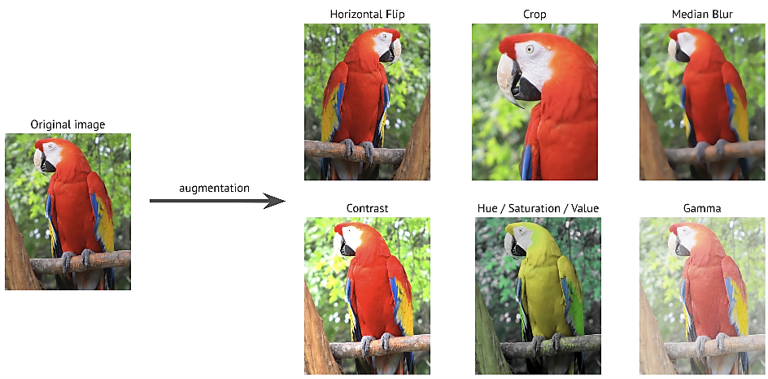

In [17]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [18]:
A.ShiftScaleRotate(rotate_limit=15, border_mode=cv2.BORDER_CONSTANT, value=(127,127,127), p=0.5),
A.RandomSizedBBoxSafeCrop(height=IMAGE_SIZE, width=IMAGE_SIZE),
A.HorizontalFlip(p=0.5),
A.RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, p=1),
A.RandomBrightnessContrast(p=0.3)

NameError: name 'IMAGE_SIZE' is not defined

In [24]:
class Detection_dataset():
    def __init__(self, data_dir, phase, transformer=None):
        self.data_dir = data_dir
        self.phase = phase
        self.data_df = pd.read_csv(os.path.join(self.data_dir, 'df.csv'))
        self.image_files = [fn for fn in os.listdir(os.path.join(self.data_dir, phase)) if fn.endswith("jpg")]
        self.transformer = transformer
        
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, index):
        filename, image = self.get_image(index)
        bboxes, class_ids = self.get_label(filename)

        #albumentation 기반으로 transformer를 작성하고 transformer가 실제로 들어왔을때 image, bboxes, class_ids를 augmentation으로 변조를 한 결과값을 넘겨줄때 작동
        if self.transformer: 
            transformed_data = self.transformer(image=image, bboxes=bboxes, class_ids=class_ids)
            image = transformed_data['image']
            bboxes = np.array(transformed_data['bboxes'])
            class_ids = np.array(transformed_data['class_ids'])
            
            # 예외처리
            if len(class_ids) == 0:
                bboxes = np.array([[0., 0., 0., 0.]], dtype=np.float32)
                class_ids = np.array([-1])
                #-1의 값이 class_ids에 -1이 들어오면 loss계산 안함. 

        target = np.concatenate((bboxes, class_ids[:, np.newaxis]), axis=1)
        return image, target, filename
    
    
    def get_image(self, index):
        filename = self.image_files[index]
        image_path = os.path.join(self.data_dir, self.phase, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return filename, image
    
    
    def get_label(self, filename):
        image_id = filename.split('.')[0]
        meta_data = self.data_df[self.data_df['ImageID'] == image_id]
        cate_names = meta_data["LabelName"].values
        class_ids = np.array([CLASS_NAME_TO_ID[cate_name] for cate_name in cate_names])
        bboxes = meta_data[["XMin", "XMax", "YMin", "YMax"]].values
        bboxes[:, [1,2]] = bboxes[:, [2,1]]
        bboxes[:, 2:4] -= bboxes[:, 0:2] # w, h 값은 xmin-xmax , ymin - ymax
        bboxes[:, 0:2] += (bboxes[:, 2:4] / 2)
        # xcen, ycen 값은 w, h /2 에 xmin, ymin을 더해주면 됨
        return bboxes, class_ids

In [25]:
import random

random.seed(1234)

In [26]:
IMAGE_SIZE = 448
transformer = A.Compose([
        A.ShiftScaleRotate(rotate_limit=15, border_mode=cv2.BORDER_CONSTANT, value=(127,127,127), p=0.5),
        #border_mode = rotate하면서 생긴 빈공간 채움
        #p = augmentation이 발동할 확률 50%
        A.RandomSizedBBoxSafeCrop(height=IMAGE_SIZE, width=IMAGE_SIZE),
        A.HorizontalFlip(p=0.5),
        A.RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, p=1),
        A.RandomBrightnessContrast(p=0.3),
#         A.Normalize(mean=(0.485, 0.456, 0.406),std=(0.229, 0.224, 0.225)),
#         ToTensorV2(),
    ],
    bbox_params=A.BboxParams(format='yolo', label_fields=['class_ids']),
)

data_dir = "../DATASET/Detection/"
transformed_dataset = Detection_dataset(data_dir=data_dir, phase="train", transformer=transformer)

In [29]:
import numpy as np

In [30]:
@interact(index=(0, len(transformed_dataset)-1))
def show_sample(index=0):
    image, target, filename = transformed_dataset[index]
    img_H, img_W, _ = image.shape

    bboxes = target[:, 0:4]
    class_ids = target[:, 4]
    bboxes[:, [0,2]] *= img_W
    bboxes[:, [1,3]] *= img_H

    canvas = visualize(image, bboxes, class_ids)
    plt.figure(figsize=(6,6))
    plt.imshow(canvas)
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=13702), Output()), _dom_classes=('widget-int…

In [31]:
IMAGE_SIZE = 448

transformer = A.Compose([
        A.ShiftScaleRotate(rotate_limit=15, border_mode=cv2.BORDER_CONSTANT, value=(127,127,127), p=0.5),
        A.RandomSizedBBoxSafeCrop(height=IMAGE_SIZE, width=IMAGE_SIZE),
        A.HorizontalFlip(p=0.5),
        A.RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, p=1),
        A.RandomBrightnessContrast(p=0.3),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ],
    bbox_params=A.BboxParams(format='yolo', label_fields=['class_ids']),
)

In [32]:
data_dir = "../DATASET/Detection/"
transformed_dataset = Detection_dataset(data_dir=data_dir, phase="train", transformer=transformer)

In [33]:
transformed_dataset[0]

(tensor([[[ 1.3242,  1.3584,  1.4783,  ...,  0.1768,  0.0912,  0.0569],
          [ 1.3242,  1.3584,  1.4783,  ...,  0.1768,  0.0912,  0.0569],
          [ 1.3413,  1.3755,  1.4612,  ...,  0.1083,  0.0398,  0.0056],
          ...,
          [ 0.5707,  0.5536,  0.5364,  ...,  0.8961,  0.3481,  0.1426],
          [ 0.5364,  0.5193,  0.5022,  ...,  0.9303,  0.3309,  0.1083],
          [ 0.5364,  0.5193,  0.5022,  ...,  0.9132,  0.3309,  0.1083]],
 
         [[ 1.7458,  1.7808,  1.8683,  ...,  0.3978,  0.2927,  0.2577],
          [ 1.7458,  1.7808,  1.8683,  ...,  0.3978,  0.2927,  0.2577],
          [ 1.7458,  1.7808,  1.8508,  ...,  0.3277,  0.2402,  0.2052],
          ...,
          [-1.6331, -1.6331, -1.6331,  ...,  0.9230,  0.3452,  0.1352],
          [-1.6331, -1.6331, -1.6331,  ...,  0.9405,  0.3277,  0.1001],
          [-1.6331, -1.6331, -1.6331,  ...,  0.9405,  0.3277,  0.1001]],
 
         [[ 2.0997,  2.1171,  2.1868,  ...,  0.5136,  0.4265,  0.4091],
          [ 2.0997,  2.1171,

In [34]:
import torch

In [35]:
def collate_fn(batch):
    image_list = []
    target_list = []
    filename_list = []
    
    for a,b,c in batch:
        image_list.append(a)
        target_list.append(b)
        filename_list.append(c)

    return torch.stack(image_list, dim=0), target_list, filename_list

In [36]:
from torch.utils.data import DataLoader

In [37]:
data_dir = "../DATASET/Detection/"
BATCH_SIZE = 4

trainset = Detection_dataset(data_dir=data_dir, phase="train", transformer=transformer)
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)

In [21]:
targets

NameError: name 'targets' is not defined

In [38]:
def build_dataloader(data_dir, batch_size=4, image_size=448):
    #augmentation 기법사용으로 train_transformer와 val_transformer가 다르다.
    #train_transformer에서 augmentation 동작
    #val_transformer에선 resize, normalize, tensor변환같은 기본적인 것만 실행
    train_transformer = A.Compose([
        A.ShiftScaleRotate(rotate_limit=15, border_mode=cv2.BORDER_CONSTANT, value=(127,127,127), p=0.5),
        A.RandomSizedBBoxSafeCrop(height=IMAGE_SIZE, width=IMAGE_SIZE),
        A.HorizontalFlip(p=0.5),
        A.RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, p=1),
        A.RandomBrightnessContrast(p=0.3),
        A.Normalize(mean=(0.485, 0.456, 0.406),std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
        ],
        bbox_params=A.BboxParams(format='yolo', label_fields=['class_ids']),
    )
    
    val_transformer = A.Compose([
            A.Resize(height=image_size, width=image_size),
            A.Normalize(mean=(0.485, 0.456, 0.406),std=(0.229, 0.224, 0.225)),
            ToTensorV2(),
        ],
        bbox_params=A.BboxParams(format='yolo', label_fields=['class_ids']),
    )
    
    dataloaders = {}
    train_dataset = Detection_dataset(data_dir=data_dir, phase="train", transformer=train_transformer)
    dataloaders["train"] = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

    val_dataset = Detection_dataset(data_dir=data_dir, phase="val", transformer=val_transformer)
    dataloaders["val"] = DataLoader(val_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)
    return dataloaders

In [39]:
data_dir = "../DATASET/Detection/"
BATCH_SIZE = 12
dataloaders = build_dataloader(data_dir, batch_size=BATCH_SIZE)

In [40]:
for _ in range(3):
    for phase in ["train", "val"]:
        for index, batch in enumerate(dataloaders[phase]):
            images = batch[0]
            targets = batch[1]
            filenames = batch[2]
                    
            if index % 100 == 0:
                print(f"{phase} - {index}/{len(dataloaders[phase])}")

train - 0/1142


KeyboardInterrupt: 

## 3. YOLOv1 아키텍처와 Loss function 구현해보기

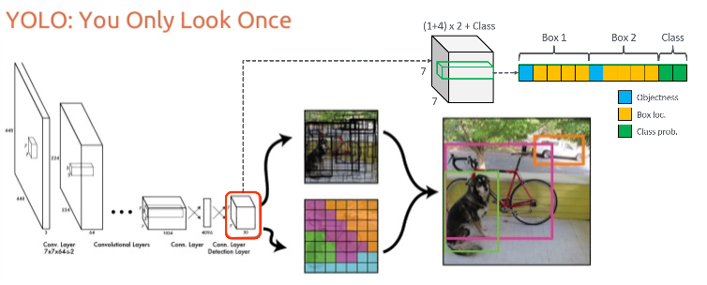

In [41]:
import torchvision
import torch.nn as nn

In [42]:
class YOLOv1_RESNET(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        num_classes = num_classes
        num_bboxes = 2
        grid_size = 7
        
        resnet18 = torchvision.models.resnet18(pretrained=True)
        layers = [m for m in resnet18.children()]
    
        self.backbone = nn.Sequential(*layers[:-2])
        
        self.head = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=1, padding=0,bias=False),
            nn.BatchNorm2d(1024),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=1024, out_channels=1024, kernel_size=3, padding=1,bias=False),
            nn.BatchNorm2d(1024),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=1024, out_channels=1024, kernel_size=3, padding=1,bias=False),
            nn.BatchNorm2d(1024),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=1024, out_channels=1024, kernel_size=3, padding=1,bias=False),
            nn.BatchNorm2d(1024),
            nn.ReLU(inplace=True),
            
            nn.Conv2d(in_channels=1024, out_channels=(4+1)*num_bboxes+num_classes, kernel_size=1, padding=0, bias=False),
            nn.AdaptiveAvgPool2d(output_size=(grid_size, grid_size))
        )
        
    def forward(self, x):
        out = self.backbone(x)
        out = self.head(out)
        return out
        # 12,7,7 -> 7*7(grid_size) x 12(feature depth)

In [43]:
NUM_CLASSES = 2
model = YOLOv1_RESNET(num_classes=NUM_CLASSES)
x = torch.randn(1, 3, 448, 448)
with torch.no_grad():
    y = model(x)
print(y.shape)

torch.Size([1, 12, 7, 7])


In [44]:
data_dir = "../DATASET/Detection/"
BATCH_SIZE = 3

trainset = Detection_dataset(data_dir=data_dir, phase="train", transformer=transformer)
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)
model = YOLOv1_RESNET(num_classes=NUM_CLASSES)

for index, batch in enumerate(trainloader):
    images = batch[0] #(3,3, 448,448)
    targets = batch[1]
    filenames = batch[2]
    
    predictions = model(images) #(3,12,7,7)
    
    if index == 0:
        break

In [45]:
class YOLOv1_LOSS():
    def __init__(self, num_classes, device, lambda_coord=5., lambda_noobj=0.5):
        self.num_classes = num_classes
        self.device = device
        self.grid_size = 7
        self.lambda_coord = lambda_coord
        self.lambda_noobj = lambda_noobj
        self.mse_loss = nn.MSELoss(reduction="sum")

    def __call__(self, predictions, targets):
        self.batch_size, _, _, _ = predictions.shape
        groundtruths = self.build_batch_target_grid(targets)
        groundtruths = groundtruths.to(self.device)
        
        with torch.no_grad():
            iou1 = self.get_IoU(predictions[:, 1:5, ...], groundtruths[:, 1:5, ...])
            iou2 = self.get_IoU(predictions[:, 6:10, ...], groundtruths[:, 1:5, ...])

        ious = torch.stack([iou1, iou2], dim=1)
        max_iou, best_box = ious.max(dim=1, keepdim=True)
        max_iou = torch.cat([max_iou, max_iou], dim=1)
        best_box = torch.cat([best_box.eq(0), best_box.eq(1)], dim=1)

        predictions_ = predictions[:, :5*2, ...].reshape(self.batch_size, 2, 5, self.grid_size, self.grid_size)
        obj_pred = predictions_[:, :, 0, ...]
        xy_pred = predictions_[:, :, 1:3, ...]
        wh_pred = predictions_[:, :, 3:5, ...]
        cls_pred = predictions[:, 5*2:, ...]

        groundtruths_ = groundtruths[:, :5, ...].reshape(self.batch_size, 1, 5, self.grid_size, self.grid_size)
        obj_target = groundtruths_[:, :, 0, ...]
        xy_target = groundtruths_[:, :, 1:3, ...]
        wh_target= groundtruths_[:, :, 3:5, ...]
        cls_target = groundtruths[:, 5:, ...]
        
        positive = obj_target * best_box

        obj_loss = self.mse_loss(positive * obj_pred, positive * ious)
        noobj_loss = self.mse_loss((1 - positive) * obj_pred, ious*0)
        xy_loss = self.mse_loss(positive.unsqueeze(dim=2) * xy_pred, positive.unsqueeze(dim=2) * xy_target)
        wh_loss = self.mse_loss(positive.unsqueeze(dim=2) * (wh_pred.sign() * (wh_pred.abs() + 1e-8).sqrt()),
                           positive.unsqueeze(dim=2) * (wh_target + 1e-8).sqrt())
        cls_loss = self.mse_loss(obj_target * cls_pred, cls_target)
        
        obj_loss /= self.batch_size
        noobj_loss /= self.batch_size
        bbox_loss = (xy_loss+wh_loss) / self.batch_size
        cls_loss /= self.batch_size
        
        total_loss = obj_loss + self.lambda_noobj*noobj_loss + self.lambda_coord*bbox_loss + cls_loss
        return total_loss, (obj_loss.item(), noobj_loss.item(), bbox_loss.item(), cls_loss.item())
    
    
    def build_target_grid(self, target):
        target_grid = torch.zeros((1+4+self.num_classes, self.grid_size, self.grid_size), device=self.device)

        for gt in target:
            xc, yc, w, h, cls_id = gt
            
            if cls_id == -1:
                return target_grid
            
            xn = (xc % (1/self.grid_size))
            yn = (yc % (1/self.grid_size))
            cls_id = int(cls_id)

            i_grid = int(xc * self.grid_size)
            j_grid = int(yc * self.grid_size)
            target_grid[0, j_grid, i_grid] = 1
            target_grid[1:5, j_grid, i_grid] = torch.Tensor([xn,yn,w,h])
            target_grid[5+cls_id, j_grid, i_grid] = 1
            
        return target_grid
    
    
    def build_batch_target_grid(self, targets):
        target_grid_batch = torch.stack([self.build_target_grid(target) for target in targets], dim=0)
        return target_grid_batch
    
    
    def get_IoU(self, cbox1, cbox2):
        box1 = self.xywh_to_xyxy(cbox1)
        box2 = self.xywh_to_xyxy(cbox2)

        x1 = torch.max(box1[:, 0, ...], box2[:, 0, ...])
        y1 = torch.max(box1[:, 1, ...], box2[:, 1, ...])
        x2 = torch.min(box1[:, 2, ...], box2[:, 2, ...])
        y2 = torch.min(box1[:, 3, ...], box2[:, 3, ...])

        intersection = (x2-x1).clamp(min=0) * (y2-y1).clamp(min=0)
        union = abs(cbox1[:, 2, ...]*cbox1[:, 3, ...]) + \
                abs(cbox2[:, 2, ...]*cbox2[:, 3, ...]) - intersection

        intersection[intersection.gt(0)] = intersection[intersection.gt(0)] / union[intersection.gt(0)]
        return intersection
    
    def generate_xy_normed_grid(self):
        y_offset, x_offset = torch.meshgrid(torch.arange(self.grid_size), torch.arange(self.grid_size))
        xy_grid = torch.stack([x_offset, y_offset], dim=0)
        xy_normed_grid = xy_grid / self.grid_size
        return xy_normed_grid.to(self.device)
    
    def xywh_to_xyxy(self, bboxes):
        xy_normed_grid = self.generate_xy_normed_grid()
        xcyc = bboxes[:,0:2,...] + xy_normed_grid.tile(self.batch_size, 1,1,1)
        wh = bboxes[:,2:4,...]
        x1y1 = xcyc - (wh/2)
        x2y2 = xcyc + (wh/2)
        return torch.cat([x1y1, x2y2], dim=1)

In [46]:
data_dir = "../DATASET/Detection/"
is_cuda = False

BATCH_SIZE = 12
DEVICE = torch.device('cuda' if torch.cuda.is_available() and is_cuda else 'cpu')

trainset = Detection_dataset(data_dir=data_dir, phase="train", transformer=transformer)
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
model = YOLOv1_RESNET(num_classes=NUM_CLASSES)
criterion = YOLOv1_LOSS(num_classes=NUM_CLASSES, device=DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, weight_decay=5e-4)

In [47]:
for index, batch in enumerate(trainloader):
    images = batch[0].to(DEVICE)
    targets = batch[1]
    filenames = batch[2]
    
    predictions = model(images)
    loss, (obj_loss, noobj_loss, bbox_loss, cls_loss) = criterion(predictions, targets)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
        
    print(loss.item(), obj_loss, noobj_loss, bbox_loss, cls_loss)
    
    if index == 5:
        break

KeyboardInterrupt: 

## 4. Detector 학습을 위한 코드 작성해보기

In [50]:
from collections import defaultdict

In [51]:
def train_one_epoch(dataloaders, model, criterion, optimizer, device):
    train_loss = defaultdict(float)
    val_loss = defaultdict(float)
    
    for phase in ["train", "val"]:
        if phase == "train":
            model.train()
        else:
            model.eval()
        
        running_loss = defaultdict(float)
        for index, batch in enumerate(dataloaders[phase]):
            images = batch[0].to(device)
            targets = batch[1]
            filenames = batch[2]
            
            with torch.set_grad_enabled(phase == "train"):
                predictions = model(images)
            loss, (obj_loss, noobj_loss, bbox_loss, cls_loss) = criterion(predictions, targets)
  
            if phase == "train":
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
                running_loss["total_loss"] += loss.item()
                running_loss["obj_loss"] += obj_loss
                running_loss["noobj_loss"] += noobj_loss
                running_loss["bbox_loss"] += bbox_loss
                running_loss["cls_loss"] += cls_loss
                
                train_loss["total_loss"] += loss.item()
                train_loss["obj_loss"] += obj_loss
                train_loss["noobj_loss"] += noobj_loss
                train_loss["bbox_loss"] += bbox_loss
                train_loss["cls_loss"] += cls_loss
                
                if (index > 0) and (index % VERBOSE_FREQ) == 0:
                    text = f"iteration:[{index}/{len(dataloaders[phase])}] - "
                    for k, v in running_loss.items():
                        text += f"{k}: {v/VERBOSE_FREQ:.4f}  "
                        running_loss[k] = 0.
                    print(text)
            else:
                val_loss["total_loss"] += loss.item()
                val_loss["obj_loss"] += obj_loss
                val_loss["noobj_loss"] += noobj_loss
                val_loss["bbox_loss"] += bbox_loss
                val_loss["cls_loss"] += cls_loss
            
            del batch, loss
            torch.cuda.empty_cache()
            
    for k in train_loss.keys():
        train_loss[k] /= len(dataloaders["train"])
        val_loss[k] /= len(dataloaders["val"])

    return train_loss, val_loss

In [52]:
from utils import save_model

In [53]:
data_dir = "../DATASET/Detection/"
is_cuda = True

NUM_CLASSES = 2
IMAGE_SIZE = 448
BATCH_SIZE = 12
VERBOSE_FREQ = 100
DEVICE = torch.device('cuda' if torch.cuda.is_available and is_cuda else 'cpu')

dataloaders = build_dataloader(data_dir=data_dir, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE)
model = YOLOv1_RESNET(num_classes=NUM_CLASSES)
model = model.to(DEVICE)
criterion = YOLOv1_LOSS(num_classes=NUM_CLASSES, device=DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)

In [54]:
num_epochs = 100

best_epoch = 0
best_score = float('inf')
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    train_loss, val_loss = train_one_epoch(dataloaders, model, criterion, optimizer, DEVICE)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    print(f"epoch:{epoch+1}/{num_epochs} - Train Loss: {train_loss['total_loss']:.4f}, Val Loss: {val_loss['total_loss']:.4f}")
    
    if (epoch+1) % 10 == 0:
        save_model(model.state_dict(), f'model_{epoch+1}.pth')

iteration:[100/1142] - total_loss: 4.7301  obj_loss: 0.1633  noobj_loss: 1.9226  bbox_loss: 0.5618  cls_loss: 0.7968  
iteration:[200/1142] - total_loss: 1.8322  obj_loss: 0.2660  noobj_loss: 0.3851  bbox_loss: 0.1594  cls_loss: 0.5766  
iteration:[300/1142] - total_loss: 1.3180  obj_loss: 0.3400  noobj_loss: 0.1945  bbox_loss: 0.0784  cls_loss: 0.4889  
iteration:[400/1142] - total_loss: 2.4215  obj_loss: 0.2789  noobj_loss: 0.2429  bbox_loss: 0.2962  cls_loss: 0.5404  
iteration:[500/1142] - total_loss: 1.2633  obj_loss: 0.3290  noobj_loss: 0.1691  bbox_loss: 0.0665  cls_loss: 0.5170  
iteration:[600/1142] - total_loss: 1.1678  obj_loss: 0.3577  noobj_loss: 0.1679  bbox_loss: 0.0548  cls_loss: 0.4522  
iteration:[700/1142] - total_loss: 1.1461  obj_loss: 0.3670  noobj_loss: 0.1710  bbox_loss: 0.0476  cls_loss: 0.4555  
iteration:[800/1142] - total_loss: 1.1292  obj_loss: 0.3659  noobj_loss: 0.1699  bbox_loss: 0.0468  cls_loss: 0.4443  
iteration:[900/1142] - total_loss: 1.0990  obj_l

iteration:[200/1142] - total_loss: 0.6844  obj_loss: 0.2784  noobj_loss: 0.2321  bbox_loss: 0.0200  cls_loss: 0.1898  
iteration:[300/1142] - total_loss: 0.6792  obj_loss: 0.2755  noobj_loss: 0.2206  bbox_loss: 0.0207  cls_loss: 0.1902  
iteration:[400/1142] - total_loss: 0.6486  obj_loss: 0.2706  noobj_loss: 0.2219  bbox_loss: 0.0176  cls_loss: 0.1791  
iteration:[500/1142] - total_loss: 0.6938  obj_loss: 0.2896  noobj_loss: 0.2214  bbox_loss: 0.0202  cls_loss: 0.1926  
iteration:[600/1142] - total_loss: 0.6570  obj_loss: 0.2626  noobj_loss: 0.2198  bbox_loss: 0.0200  cls_loss: 0.1843  
iteration:[700/1142] - total_loss: 0.6576  obj_loss: 0.2613  noobj_loss: 0.2150  bbox_loss: 0.0191  cls_loss: 0.1933  
iteration:[800/1142] - total_loss: 0.6572  obj_loss: 0.2552  noobj_loss: 0.2122  bbox_loss: 0.0202  cls_loss: 0.1949  
iteration:[900/1142] - total_loss: 0.6788  obj_loss: 0.2719  noobj_loss: 0.2193  bbox_loss: 0.0195  cls_loss: 0.1997  
iteration:[1000/1142] - total_loss: 0.6782  obj_

iteration:[300/1142] - total_loss: 0.5797  obj_loss: 0.2490  noobj_loss: 0.2107  bbox_loss: 0.0177  cls_loss: 0.1366  
iteration:[400/1142] - total_loss: 0.5436  obj_loss: 0.2296  noobj_loss: 0.2057  bbox_loss: 0.0154  cls_loss: 0.1343  
iteration:[500/1142] - total_loss: 0.5722  obj_loss: 0.2438  noobj_loss: 0.2145  bbox_loss: 0.0158  cls_loss: 0.1420  
iteration:[600/1142] - total_loss: 0.5707  obj_loss: 0.2440  noobj_loss: 0.2129  bbox_loss: 0.0162  cls_loss: 0.1394  
iteration:[700/1142] - total_loss: 0.5394  obj_loss: 0.2434  noobj_loss: 0.2136  bbox_loss: 0.0143  cls_loss: 0.1176  
iteration:[800/1142] - total_loss: 0.5682  obj_loss: 0.2461  noobj_loss: 0.2109  bbox_loss: 0.0153  cls_loss: 0.1402  
iteration:[900/1142] - total_loss: 0.5619  obj_loss: 0.2502  noobj_loss: 0.2094  bbox_loss: 0.0152  cls_loss: 0.1312  
iteration:[1000/1142] - total_loss: 0.5722  obj_loss: 0.2492  noobj_loss: 0.2233  bbox_loss: 0.0164  cls_loss: 0.1296  
iteration:[1100/1142] - total_loss: 0.5557  obj

iteration:[400/1142] - total_loss: 0.5024  obj_loss: 0.2313  noobj_loss: 0.2115  bbox_loss: 0.0130  cls_loss: 0.1004  
iteration:[500/1142] - total_loss: 0.5382  obj_loss: 0.2513  noobj_loss: 0.2231  bbox_loss: 0.0145  cls_loss: 0.1030  
iteration:[600/1142] - total_loss: 0.5241  obj_loss: 0.2447  noobj_loss: 0.2288  bbox_loss: 0.0143  cls_loss: 0.0936  
iteration:[700/1142] - total_loss: 0.5170  obj_loss: 0.2207  noobj_loss: 0.2077  bbox_loss: 0.0142  cls_loss: 0.1213  
iteration:[800/1142] - total_loss: 0.5166  obj_loss: 0.2265  noobj_loss: 0.2152  bbox_loss: 0.0141  cls_loss: 0.1122  
iteration:[900/1142] - total_loss: 0.5057  obj_loss: 0.2323  noobj_loss: 0.2079  bbox_loss: 0.0133  cls_loss: 0.1030  
iteration:[1000/1142] - total_loss: 0.5117  obj_loss: 0.2400  noobj_loss: 0.2165  bbox_loss: 0.0137  cls_loss: 0.0947  
iteration:[1100/1142] - total_loss: 0.5160  obj_loss: 0.2393  noobj_loss: 0.2146  bbox_loss: 0.0135  cls_loss: 0.1020  
epoch:19/100 - Train Loss: 0.5194, Val Loss: 0

iteration:[500/1142] - total_loss: 0.5025  obj_loss: 0.2333  noobj_loss: 0.2169  bbox_loss: 0.0135  cls_loss: 0.0935  
iteration:[600/1142] - total_loss: 0.5079  obj_loss: 0.2265  noobj_loss: 0.2169  bbox_loss: 0.0122  cls_loss: 0.1121  
iteration:[700/1142] - total_loss: 0.4901  obj_loss: 0.2450  noobj_loss: 0.2193  bbox_loss: 0.0118  cls_loss: 0.0763  
iteration:[800/1142] - total_loss: 0.4982  obj_loss: 0.2480  noobj_loss: 0.2191  bbox_loss: 0.0133  cls_loss: 0.0739  
iteration:[900/1142] - total_loss: 0.4822  obj_loss: 0.2324  noobj_loss: 0.2167  bbox_loss: 0.0131  cls_loss: 0.0761  
iteration:[1000/1142] - total_loss: 0.4834  obj_loss: 0.2352  noobj_loss: 0.2176  bbox_loss: 0.0127  cls_loss: 0.0760  
iteration:[1100/1142] - total_loss: 0.5305  obj_loss: 0.2413  noobj_loss: 0.2259  bbox_loss: 0.0140  cls_loss: 0.1063  
epoch:25/100 - Train Loss: 0.4995, Val Loss: 0.5581
iteration:[100/1142] - total_loss: 0.5068  obj_loss: 0.2417  noobj_loss: 0.2273  bbox_loss: 0.0137  cls_loss: 0.0

iteration:[600/1142] - total_loss: 0.5036  obj_loss: 0.2428  noobj_loss: 0.2271  bbox_loss: 0.0123  cls_loss: 0.0858  
iteration:[700/1142] - total_loss: 0.4618  obj_loss: 0.2265  noobj_loss: 0.2220  bbox_loss: 0.0112  cls_loss: 0.0682  
iteration:[800/1142] - total_loss: 0.4772  obj_loss: 0.2379  noobj_loss: 0.2181  bbox_loss: 0.0120  cls_loss: 0.0701  
iteration:[900/1142] - total_loss: 0.4935  obj_loss: 0.2294  noobj_loss: 0.2254  bbox_loss: 0.0121  cls_loss: 0.0909  
iteration:[1000/1142] - total_loss: 0.5083  obj_loss: 0.2600  noobj_loss: 0.2230  bbox_loss: 0.0119  cls_loss: 0.0771  
iteration:[1100/1142] - total_loss: 0.4625  obj_loss: 0.2298  noobj_loss: 0.2175  bbox_loss: 0.0118  cls_loss: 0.0650  
epoch:31/100 - Train Loss: 0.4766, Val Loss: 0.5544
iteration:[100/1142] - total_loss: 0.4374  obj_loss: 0.2037  noobj_loss: 0.2004  bbox_loss: 0.0113  cls_loss: 0.0769  
iteration:[200/1142] - total_loss: 0.4730  obj_loss: 0.2272  noobj_loss: 0.2140  bbox_loss: 0.0122  cls_loss: 0.0

iteration:[700/1142] - total_loss: 0.4387  obj_loss: 0.2266  noobj_loss: 0.2253  bbox_loss: 0.0105  cls_loss: 0.0470  
iteration:[800/1142] - total_loss: 0.4929  obj_loss: 0.2476  noobj_loss: 0.2277  bbox_loss: 0.0123  cls_loss: 0.0700  
iteration:[900/1142] - total_loss: 0.4506  obj_loss: 0.2284  noobj_loss: 0.2232  bbox_loss: 0.0115  cls_loss: 0.0534  
iteration:[1000/1142] - total_loss: 0.4411  obj_loss: 0.2234  noobj_loss: 0.2149  bbox_loss: 0.0113  cls_loss: 0.0535  
iteration:[1100/1142] - total_loss: 0.4552  obj_loss: 0.2281  noobj_loss: 0.2209  bbox_loss: 0.0125  cls_loss: 0.0541  
epoch:37/100 - Train Loss: 0.4636, Val Loss: 0.5622
iteration:[100/1142] - total_loss: 0.4475  obj_loss: 0.2211  noobj_loss: 0.2168  bbox_loss: 0.0118  cls_loss: 0.0592  
iteration:[200/1142] - total_loss: 0.4571  obj_loss: 0.2359  noobj_loss: 0.2290  bbox_loss: 0.0100  cls_loss: 0.0565  
iteration:[300/1142] - total_loss: 0.4837  obj_loss: 0.2460  noobj_loss: 0.2285  bbox_loss: 0.0117  cls_loss: 0.0

iteration:[800/1142] - total_loss: 0.4366  obj_loss: 0.2216  noobj_loss: 0.2177  bbox_loss: 0.0107  cls_loss: 0.0526  
iteration:[900/1142] - total_loss: 0.4699  obj_loss: 0.2203  noobj_loss: 0.2176  bbox_loss: 0.0127  cls_loss: 0.0773  
iteration:[1000/1142] - total_loss: 0.4738  obj_loss: 0.2379  noobj_loss: 0.2253  bbox_loss: 0.0102  cls_loss: 0.0721  
iteration:[1100/1142] - total_loss: 0.4640  obj_loss: 0.2367  noobj_loss: 0.2202  bbox_loss: 0.0111  cls_loss: 0.0618  
epoch:43/100 - Train Loss: 0.4529, Val Loss: 0.5572
iteration:[100/1142] - total_loss: 0.4267  obj_loss: 0.2129  noobj_loss: 0.2149  bbox_loss: 0.0093  cls_loss: 0.0597  
iteration:[200/1142] - total_loss: 0.4568  obj_loss: 0.2304  noobj_loss: 0.2273  bbox_loss: 0.0109  cls_loss: 0.0583  
iteration:[300/1142] - total_loss: 0.4739  obj_loss: 0.2419  noobj_loss: 0.2291  bbox_loss: 0.0110  cls_loss: 0.0628  
iteration:[400/1142] - total_loss: 0.4720  obj_loss: 0.2492  noobj_loss: 0.2425  bbox_loss: 0.0101  cls_loss: 0.0

iteration:[900/1142] - total_loss: 0.4364  obj_loss: 0.2274  noobj_loss: 0.2256  bbox_loss: 0.0099  cls_loss: 0.0468  
iteration:[1000/1142] - total_loss: 0.4296  obj_loss: 0.2223  noobj_loss: 0.2258  bbox_loss: 0.0098  cls_loss: 0.0455  
iteration:[1100/1142] - total_loss: 0.4349  obj_loss: 0.2238  noobj_loss: 0.2259  bbox_loss: 0.0097  cls_loss: 0.0494  
epoch:49/100 - Train Loss: 0.4407, Val Loss: 0.5644
iteration:[100/1142] - total_loss: 0.4349  obj_loss: 0.2252  noobj_loss: 0.2284  bbox_loss: 0.0107  cls_loss: 0.0418  
iteration:[200/1142] - total_loss: 0.4322  obj_loss: 0.2305  noobj_loss: 0.2397  bbox_loss: 0.0096  cls_loss: 0.0339  
iteration:[300/1142] - total_loss: 0.4323  obj_loss: 0.2285  noobj_loss: 0.2240  bbox_loss: 0.0106  cls_loss: 0.0388  
iteration:[400/1142] - total_loss: 0.4365  obj_loss: 0.2341  noobj_loss: 0.2179  bbox_loss: 0.0097  cls_loss: 0.0451  
iteration:[500/1142] - total_loss: 0.4212  obj_loss: 0.2194  noobj_loss: 0.2205  bbox_loss: 0.0098  cls_loss: 0.0

iteration:[1000/1142] - total_loss: 0.4297  obj_loss: 0.2247  noobj_loss: 0.2147  bbox_loss: 0.0104  cls_loss: 0.0456  
iteration:[1100/1142] - total_loss: 0.4411  obj_loss: 0.2233  noobj_loss: 0.2301  bbox_loss: 0.0099  cls_loss: 0.0532  
epoch:55/100 - Train Loss: 0.4382, Val Loss: 0.5590
iteration:[100/1142] - total_loss: 0.4421  obj_loss: 0.2279  noobj_loss: 0.2220  bbox_loss: 0.0097  cls_loss: 0.0548  
iteration:[200/1142] - total_loss: 0.4172  obj_loss: 0.2247  noobj_loss: 0.2239  bbox_loss: 0.0095  cls_loss: 0.0329  
iteration:[300/1142] - total_loss: 0.4574  obj_loss: 0.2440  noobj_loss: 0.2310  bbox_loss: 0.0099  cls_loss: 0.0482  
iteration:[400/1142] - total_loss: 0.3971  obj_loss: 0.2114  noobj_loss: 0.2203  bbox_loss: 0.0096  cls_loss: 0.0277  
iteration:[500/1142] - total_loss: 0.4355  obj_loss: 0.2258  noobj_loss: 0.2242  bbox_loss: 0.0102  cls_loss: 0.0465  
iteration:[600/1142] - total_loss: 0.4384  obj_loss: 0.2259  noobj_loss: 0.2250  bbox_loss: 0.0095  cls_loss: 0.0

iteration:[1100/1142] - total_loss: 0.4084  obj_loss: 0.2200  noobj_loss: 0.2213  bbox_loss: 0.0086  cls_loss: 0.0349  
epoch:61/100 - Train Loss: 0.4306, Val Loss: 0.5633
iteration:[100/1142] - total_loss: 0.4291  obj_loss: 0.2434  noobj_loss: 0.2405  bbox_loss: 0.0088  cls_loss: 0.0212  
iteration:[200/1142] - total_loss: 0.4182  obj_loss: 0.2241  noobj_loss: 0.2270  bbox_loss: 0.0084  cls_loss: 0.0386  
iteration:[300/1142] - total_loss: 0.4457  obj_loss: 0.2336  noobj_loss: 0.2438  bbox_loss: 0.0094  cls_loss: 0.0433  
iteration:[400/1142] - total_loss: 0.4301  obj_loss: 0.2324  noobj_loss: 0.2341  bbox_loss: 0.0101  cls_loss: 0.0301  
iteration:[500/1142] - total_loss: 0.4450  obj_loss: 0.2351  noobj_loss: 0.2408  bbox_loss: 0.0092  cls_loss: 0.0437  
iteration:[600/1142] - total_loss: 0.3962  obj_loss: 0.2122  noobj_loss: 0.2256  bbox_loss: 0.0079  cls_loss: 0.0318  
iteration:[700/1142] - total_loss: 0.4434  obj_loss: 0.2249  noobj_loss: 0.2326  bbox_loss: 0.0119  cls_loss: 0.04

epoch:67/100 - Train Loss: 0.4280, Val Loss: 0.5461
iteration:[100/1142] - total_loss: 0.4348  obj_loss: 0.2367  noobj_loss: 0.2494  bbox_loss: 0.0090  cls_loss: 0.0282  
iteration:[200/1142] - total_loss: 0.4522  obj_loss: 0.2453  noobj_loss: 0.2485  bbox_loss: 0.0098  cls_loss: 0.0336  
iteration:[300/1142] - total_loss: 0.4311  obj_loss: 0.2328  noobj_loss: 0.2432  bbox_loss: 0.0083  cls_loss: 0.0354  
iteration:[400/1142] - total_loss: 0.4399  obj_loss: 0.2327  noobj_loss: 0.2363  bbox_loss: 0.0092  cls_loss: 0.0432  
iteration:[500/1142] - total_loss: 0.4234  obj_loss: 0.2262  noobj_loss: 0.2277  bbox_loss: 0.0085  cls_loss: 0.0409  
iteration:[600/1142] - total_loss: 0.4156  obj_loss: 0.2175  noobj_loss: 0.2332  bbox_loss: 0.0082  cls_loss: 0.0405  
iteration:[700/1142] - total_loss: 0.4112  obj_loss: 0.2249  noobj_loss: 0.2223  bbox_loss: 0.0093  cls_loss: 0.0287  
iteration:[800/1142] - total_loss: 0.4084  obj_loss: 0.2151  noobj_loss: 0.2193  bbox_loss: 0.0089  cls_loss: 0.039

iteration:[100/1142] - total_loss: 0.4253  obj_loss: 0.2328  noobj_loss: 0.2381  bbox_loss: 0.0088  cls_loss: 0.0294  
iteration:[200/1142] - total_loss: 0.3983  obj_loss: 0.2139  noobj_loss: 0.2243  bbox_loss: 0.0089  cls_loss: 0.0275  
iteration:[300/1142] - total_loss: 0.3916  obj_loss: 0.2117  noobj_loss: 0.2303  bbox_loss: 0.0077  cls_loss: 0.0263  
iteration:[400/1142] - total_loss: 0.4173  obj_loss: 0.2248  noobj_loss: 0.2271  bbox_loss: 0.0090  cls_loss: 0.0337  
iteration:[500/1142] - total_loss: 0.4205  obj_loss: 0.2263  noobj_loss: 0.2391  bbox_loss: 0.0088  cls_loss: 0.0306  
iteration:[600/1142] - total_loss: 0.4268  obj_loss: 0.2279  noobj_loss: 0.2330  bbox_loss: 0.0093  cls_loss: 0.0361  
iteration:[700/1142] - total_loss: 0.4246  obj_loss: 0.2239  noobj_loss: 0.2363  bbox_loss: 0.0089  cls_loss: 0.0381  
iteration:[800/1142] - total_loss: 0.4525  obj_loss: 0.2393  noobj_loss: 0.2496  bbox_loss: 0.0106  cls_loss: 0.0354  
iteration:[900/1142] - total_loss: 0.4234  obj_l

iteration:[200/1142] - total_loss: 0.4098  obj_loss: 0.2206  noobj_loss: 0.2282  bbox_loss: 0.0083  cls_loss: 0.0337  
iteration:[300/1142] - total_loss: 0.4399  obj_loss: 0.2327  noobj_loss: 0.2444  bbox_loss: 0.0103  cls_loss: 0.0334  
iteration:[400/1142] - total_loss: 0.4191  obj_loss: 0.2303  noobj_loss: 0.2503  bbox_loss: 0.0080  cls_loss: 0.0236  
iteration:[500/1142] - total_loss: 0.4364  obj_loss: 0.2371  noobj_loss: 0.2414  bbox_loss: 0.0085  cls_loss: 0.0358  
iteration:[600/1142] - total_loss: 0.4378  obj_loss: 0.2387  noobj_loss: 0.2485  bbox_loss: 0.0088  cls_loss: 0.0311  
iteration:[700/1142] - total_loss: 0.3941  obj_loss: 0.2114  noobj_loss: 0.2319  bbox_loss: 0.0083  cls_loss: 0.0251  
iteration:[800/1142] - total_loss: 0.4057  obj_loss: 0.2130  noobj_loss: 0.2249  bbox_loss: 0.0085  cls_loss: 0.0378  
iteration:[900/1142] - total_loss: 0.4055  obj_loss: 0.2196  noobj_loss: 0.2361  bbox_loss: 0.0088  cls_loss: 0.0240  
iteration:[1000/1142] - total_loss: 0.4005  obj_

iteration:[300/1142] - total_loss: 0.4144  obj_loss: 0.2244  noobj_loss: 0.2370  bbox_loss: 0.0081  cls_loss: 0.0311  
iteration:[400/1142] - total_loss: 0.3971  obj_loss: 0.2237  noobj_loss: 0.2272  bbox_loss: 0.0079  cls_loss: 0.0205  
iteration:[500/1142] - total_loss: 0.3751  obj_loss: 0.1988  noobj_loss: 0.2098  bbox_loss: 0.0090  cls_loss: 0.0266  
iteration:[600/1142] - total_loss: 0.4142  obj_loss: 0.2232  noobj_loss: 0.2312  bbox_loss: 0.0091  cls_loss: 0.0301  
iteration:[700/1142] - total_loss: 0.4325  obj_loss: 0.2370  noobj_loss: 0.2362  bbox_loss: 0.0101  cls_loss: 0.0270  
iteration:[800/1142] - total_loss: 0.4068  obj_loss: 0.2154  noobj_loss: 0.2309  bbox_loss: 0.0074  cls_loss: 0.0389  
iteration:[900/1142] - total_loss: 0.4305  obj_loss: 0.2347  noobj_loss: 0.2519  bbox_loss: 0.0075  cls_loss: 0.0324  
iteration:[1000/1142] - total_loss: 0.4259  obj_loss: 0.2320  noobj_loss: 0.2532  bbox_loss: 0.0083  cls_loss: 0.0257  
iteration:[1100/1142] - total_loss: 0.4296  obj

iteration:[400/1142] - total_loss: 0.3937  obj_loss: 0.2171  noobj_loss: 0.2338  bbox_loss: 0.0078  cls_loss: 0.0209  
iteration:[500/1142] - total_loss: 0.4374  obj_loss: 0.2361  noobj_loss: 0.2619  bbox_loss: 0.0080  cls_loss: 0.0306  
iteration:[600/1142] - total_loss: 0.4065  obj_loss: 0.2172  noobj_loss: 0.2418  bbox_loss: 0.0083  cls_loss: 0.0271  
iteration:[700/1142] - total_loss: 0.4195  obj_loss: 0.2299  noobj_loss: 0.2402  bbox_loss: 0.0077  cls_loss: 0.0308  
iteration:[800/1142] - total_loss: 0.4218  obj_loss: 0.2236  noobj_loss: 0.2489  bbox_loss: 0.0080  cls_loss: 0.0337  
iteration:[900/1142] - total_loss: 0.4141  obj_loss: 0.2246  noobj_loss: 0.2447  bbox_loss: 0.0082  cls_loss: 0.0263  
iteration:[1000/1142] - total_loss: 0.4338  obj_loss: 0.2383  noobj_loss: 0.2557  bbox_loss: 0.0078  cls_loss: 0.0284  
iteration:[1100/1142] - total_loss: 0.3946  obj_loss: 0.2128  noobj_loss: 0.2465  bbox_loss: 0.0076  cls_loss: 0.0205  
epoch:92/100 - Train Loss: 0.4149, Val Loss: 0

iteration:[500/1142] - total_loss: 0.3980  obj_loss: 0.2163  noobj_loss: 0.2391  bbox_loss: 0.0080  cls_loss: 0.0222  
iteration:[600/1142] - total_loss: 0.3949  obj_loss: 0.2197  noobj_loss: 0.2304  bbox_loss: 0.0075  cls_loss: 0.0224  
iteration:[700/1142] - total_loss: 0.3959  obj_loss: 0.2218  noobj_loss: 0.2332  bbox_loss: 0.0076  cls_loss: 0.0195  
iteration:[800/1142] - total_loss: 0.4169  obj_loss: 0.2294  noobj_loss: 0.2440  bbox_loss: 0.0084  cls_loss: 0.0237  
iteration:[900/1142] - total_loss: 0.4026  obj_loss: 0.2191  noobj_loss: 0.2489  bbox_loss: 0.0082  cls_loss: 0.0182  
iteration:[1000/1142] - total_loss: 0.4147  obj_loss: 0.2257  noobj_loss: 0.2518  bbox_loss: 0.0084  cls_loss: 0.0209  
iteration:[1100/1142] - total_loss: 0.4143  obj_loss: 0.2219  noobj_loss: 0.2358  bbox_loss: 0.0077  cls_loss: 0.0359  
epoch:98/100 - Train Loss: 0.4028, Val Loss: 0.5643
iteration:[100/1142] - total_loss: 0.4350  obj_loss: 0.2392  noobj_loss: 0.2531  bbox_loss: 0.0086  cls_loss: 0.0

## 5. Data augmentation 적용에 따른 성능 비교해보기

Task 5. Data augmentation 적용안한 케이스
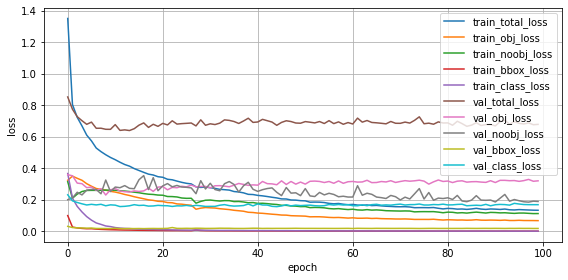

Task 6. Data augmentation 적용한 케이스
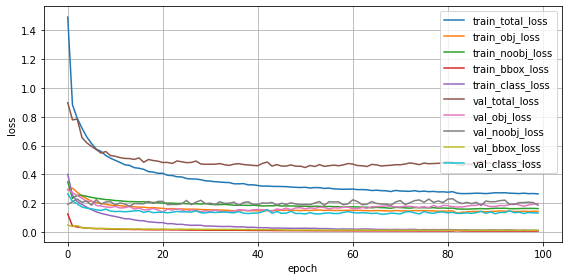

In [48]:
def load_model(ckpt_path, num_classes, device):
    checkpoint = torch.load(ckpt_path, map_location=device)
    model = YOLOv1_RESNET(num_classes=num_classes)
    model.load_state_dict(checkpoint)
    model = model.to(device)
    model.eval()
    return model

In [55]:
ckpt_path = "./trained_model/model_100.pth"

DEVICE = torch.device("cuda")
model = load_model(ckpt_path, NUM_CLASSES, DEVICE)

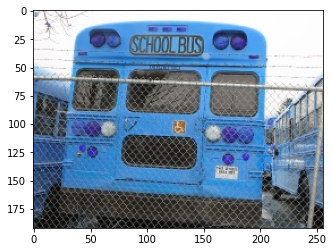

In [56]:
image = cv2.imread("../DATASET/Detection/val/e512e8e7986a9a0f.jpg")
plt.imshow(image)

In [57]:
@torch.no_grad()
def model_predict(image, model, conf_thres=0.3, iou_threshold=0.1):
    predictions = model(image)
    prediction = predictions.detach().cpu().squeeze(dim=0)
    
    grid_size = prediction.shape[-1]
    y_grid, x_grid = torch.meshgrid(torch.arange(grid_size), torch.arange(grid_size))
    stride_size = IMAGE_SIZE/grid_size

    conf = prediction[[0,5], ...].reshape(1, -1)
    xc = (prediction[[1,6], ...] * IMAGE_SIZE + x_grid*stride_size).reshape(1,-1)
    yc = (prediction[[2,7], ...] * IMAGE_SIZE + y_grid*stride_size).reshape(1,-1)
    w = (prediction[[3,8], ...] * IMAGE_SIZE).reshape(1,-1)
    h = (prediction[[4,9], ...] * IMAGE_SIZE).reshape(1,-1)
    cls = torch.max(prediction[10:, ...].reshape(NUM_CLASSES, -1), dim=0).indices.tile(1,2)
    
    x_min = xc - w/2
    y_min = yc - h/2
    x_max = xc + w/2
    y_max = yc + h/2

    prediction_res = torch.cat([x_min, y_min, x_max, y_max, conf, cls], dim=0) #(6, 49*2)
    prediction_res = prediction_res.transpose(0,1)#(49*2, 6)

    prediction_res[:, 2].clip(min=0, max=image.shape[1])
    prediction_res[:, 3].clip(min=0, max=image.shape[0])
        
    pred_res = prediction_res[prediction_res[:, 4] > conf_thres]
    nms_index = torchvision.ops.nms(boxes=pred_res[:, 0:4], scores=pred_res[:, 4], iou_threshold=iou_threshold)
    pred_res_ = pred_res[nms_index].numpy()
    
    n_obj = pred_res_.shape[0]
    bboxes = np.zeros(shape=(n_obj, 4), dtype=np.float32)
    bboxes[:, 0:2] = (pred_res_[:, 0:2] + pred_res_[:, 2:4]) / 2
    bboxes[:, 2:4] = pred_res_[:, 2:4] - pred_res_[:, 0:2]
    scores = pred_res_[:, 4]
    class_ids = pred_res_[:, 5]
    
    return bboxes, scores, class_ids

In [58]:
from torchvision.utils import make_grid

In [59]:
pred_images = []
pred_labels =[]

for index, batch in enumerate(dataloaders["val"]):
    images = batch[0].to(DEVICE)
    bboxes, scores, class_ids = model_predict(images, model, conf_thres=0.2, iou_threshold=0.1)
    
    if len(bboxes) > 0:
        prediction_yolo = np.concatenate([bboxes, scores[:, np.newaxis], class_ids[:, np.newaxis]], axis=1)
    else:
        prediction_yolo = np.array([])
        
    np_image = make_grid(images[0], normalize=True).cpu().permute(1,2,0).numpy()
    pred_images.append(np_image)
    pred_labels.append(prediction_yolo)

In [60]:
from ipywidgets import interact

@interact(index=(0,len(pred_images)-1))
def show_result(index=0):
    if len(pred_labels[index]) > 0:
        print(pred_labels[index][:, 4])
        result = visualize(pred_images[index], pred_labels[index][:, 0:4], pred_labels[index][:, 5])
    else:
        result = pred_images[index]
        
    plt.figure(figsize=(6,6))
    plt.imshow(result)
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=1521), Output()), _dom_classes=('widget-inte…

In [62]:
import json
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

In [63]:
annFile = "../DATASET/Detection/val.json"
with open(annFile, mode='r') as f:
    json_data = json.load(f)
imageToid = json_data["imageToid"]
cocoGt=COCO(annFile)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [64]:
def XcenYcenWH_to_XminYmin_WH(box):
    Xmin = box[:, 0] - box[:, 2]/2
    Ymin = box[:, 1] - box[:, 3]/2
    W = box[:, 2]
    H = box[:, 3]
    return np.stack((Xmin, Ymin, W, H), axis=1)

In [65]:
COCO_anno = []

for index, batch in enumerate(dataloaders["val"]):
    images = batch[0].to(DEVICE)
    filename = batch[2][0]
    
    bboxes, scores, class_ids = model_predict(images, model, conf_thres=0.1, iou_threshold=0.1)
    box_xywh = XcenYcenWH_to_XminYmin_WH(bboxes)
    score = scores[:, np.newaxis]
    cls_id = class_ids[:, np.newaxis]
    
    img_id = np.array([imageToid[filename], ] * len(cls_id))[:, np.newaxis]
    COCO_anno.append(np.concatenate((img_id, box_xywh, score, cls_id), axis=1))
    
    if index % 50 == 0:
        print(f"{index}/{len(dataloaders['val'])} Done.")

COCO_anno = np.concatenate(COCO_anno, axis=0)

0/1522 Done.
50/1522 Done.
100/1522 Done.
150/1522 Done.
200/1522 Done.
250/1522 Done.
300/1522 Done.
350/1522 Done.
400/1522 Done.
450/1522 Done.
500/1522 Done.
550/1522 Done.
600/1522 Done.
650/1522 Done.
700/1522 Done.
750/1522 Done.
800/1522 Done.
850/1522 Done.
900/1522 Done.
950/1522 Done.
1000/1522 Done.
1050/1522 Done.
1100/1522 Done.
1150/1522 Done.
1200/1522 Done.
1250/1522 Done.
1300/1522 Done.
1350/1522 Done.
1400/1522 Done.
1450/1522 Done.
1500/1522 Done.


In [66]:
cocoDt = cocoGt.loadRes(COCO_anno)

Loading and preparing results...
Converting ndarray to lists...
(2444, 7)
0/2444
DONE (t=0.01s)
creating index...
index created!


In [68]:
annType = "bbox"
cocoEval = COCOeval(cocoGt,cocoDt,annType)
cocoEval.evaluate()
cocoEval.accumulate()
cocoEval.summarize()
eval_stats = cocoEval.stats

Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.61s).
Accumulating evaluation results...
DONE (t=0.13s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.379
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.613
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.408
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.079
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.500
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.388
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.433
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.433
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100

## 6. Data augmentation 적용한 YOLOv1 모델 테스트해보기

In [69]:
transformer = A.Compose([
            A.Resize(height=IMAGE_SIZE, width=IMAGE_SIZE),
            A.Normalize(mean=(0.485, 0.456, 0.406),std=(0.229, 0.224, 0.225)),
            ToTensorV2()
])

In [70]:
@torch.no_grad()
def model_predict(image, model, conf_thres=0.3, iou_threshold=0.1):
    tf_data = transformer(image=image)
    tensor_image = tf_data['image'].to(DEVICE)
    tensor_image = tensor_image.unsqueeze(dim=0)
    
    predictions = model(tensor_image)
    prediction = predictions.detach().cpu().squeeze(dim=0)

    grid_size = prediction.shape[-1]
    y_grid, x_grid = torch.meshgrid(torch.arange(grid_size), torch.arange(grid_size))
    stride_size = IMAGE_SIZE/grid_size

    conf = prediction[[0,5], ...].reshape(1, -1)
    xc = (prediction[[1,6], ...] * IMAGE_SIZE + x_grid*stride_size).reshape(1,-1)
    yc = (prediction[[2,7], ...] * IMAGE_SIZE + y_grid*stride_size).reshape(1,-1)
    w = (prediction[[3,8], ...] * IMAGE_SIZE).reshape(1,-1)
    h = (prediction[[4,9], ...] * IMAGE_SIZE).reshape(1,-1)
    cls = torch.max(prediction[10:, ...].reshape(NUM_CLASSES, -1), dim=0).indices.tile(1,2)
    
    x_min = xc - w/2
    y_min = yc - h/2
    x_max = xc + w/2
    y_max = yc + h/2

    prediction_res = torch.cat([x_min, y_min, x_max, y_max, conf, cls], dim=0)
    prediction_res = prediction_res.transpose(0,1)
    
    pred_res = prediction_res[prediction_res[:, 4] > conf_thres]
    nms_index = torchvision.ops.nms(boxes=pred_res[:, 0:4], scores=pred_res[:, 4], iou_threshold=iou_threshold)
    pred_res_ = pred_res[nms_index].numpy()
    
    n_obj = pred_res_.shape[0]
    bboxes = pred_res_[:, 0:4]
    bboxes[:, 0:2] = (pred_res_[:, 0:2] + pred_res_[:, 2:4]) / 2
    bboxes[:, 2:4] = pred_res_[:, 2:4] - pred_res_[:, 0:2]
    scores = pred_res_[:, 4]
    class_ids = pred_res_[:, 5]
    
    return bboxes, scores, class_ids

In [71]:
from time import time

In [72]:
video_path = "../DATASET/sample_video.mp4"

In [73]:
vid = cv2.VideoCapture(video_path)

while (vid.isOpened()):
    ret, frame = vid.read()
    
    if ret:
        since = time()
        ori_h, ori_w = frame.shape[:2]
        bboxes, scores, class_ids = model_predict(frame, model, conf_thres=0.2, iou_threshold=0.1)
        text= f"{(time() - since)*1000:.0f}ms/image"
        
        if len(bboxes) > 0:
            bboxes[:, [0,2]] *= (ori_w/IMAGE_SIZE)
            bboxes[:, [1,3]] *= (ori_h/IMAGE_SIZE)
            bboxes[:, 2].clip(min=0, max=ori_w)
            bboxes[:, 3].clip(min=0, max=ori_h)
            result = visualize(frame, bboxes, class_ids)
        else:
            result = frame
            
        cv2.putText(result, text, (20, 40), cv2.FONT_HERSHEY_PLAIN, 2, (255, 255, 255), 2)
        cv2.imshow('camera', result)
        
        key = cv2.waitKey(1)
        if key == 27:
            break
        if key == ord('s'):
            cv2.waitKey()
    
vid.release()
cv2.destroyAllWindows()